# Facebook Message Analyzer
<b> Sun-Jung Yum </b>

<b> Current Features For a Given Chat: </b>
<ul> 
    <li> Number of Messages Sent </li> 
    <li> Number of Attachments Sent </li> 
    <li> Messages Sent Over Time </li> 
    <li> Average Word Count </li>
    <li> Average Days Passed Since Previous Text </li> 
</ul>

In [1]:
import os
import json
import numpy as np
import pylab as pl
import datetime

CURRENT_DIRECTORY = os.getcwd()
NUMBER_TO_ANALYZE = 5000
MESSAGE_THRESHOLD = 10
MESSAGE_BOUND = 1000

In [2]:
def get_json_data(chat):
    try:
        json_location = CURRENT_DIRECTORY + "/messages/" + chat + "/message_1.json"
        with open(json_location) as json_file:
            json_data = json.load(json_file)
            return json_data
    except IOError:
        pass # some things the directory aren't messages (DS_Store, stickers_used, etc.)

In [3]:
chats = os.listdir(CURRENT_DIRECTORY + "/messages/")[:NUMBER_TO_ANALYZE]
sorted_chats = []
final_data_messages = {}
final_data_times = {}
final_data_words = {}
final_data_attachments = {}
final_data_days_passed = {}
invalid_message_count = 0

In [4]:
print('Analyzing ' + str(min(NUMBER_TO_ANALYZE, len(chats))) + ' chats...')

for chat in chats:
    url = chat + '/message_1.json'
    json_data = get_json_data(chat)
    print(chat)
    if json_data != None:
        messages = json_data["messages"]
        if len(messages) >= MESSAGE_THRESHOLD and len(messages) <= MESSAGE_BOUND:
            sorted_chats.append((len(messages), chat, messages))

sorted_chats.sort(reverse=True)

print('Finished processing chats...')

Analyzing 443 chats...
sixiaoyu_hqnyxqbpig
pablocastilla_isova-r76a
SarahLip_utoUg9CVaA
mayaclemente_shh4emhsow
lucychae_rynxgqnbcw
ryahlichtenstein_4u9wzzkcaq
YunxingBai_BR93-4NP5A
jaysuryagupta_n_fll0xefg
connorgosselin_xrlob8noig
swikriteechuke_zhfnc0qedq
victoriashing_p6osp_mdew
MadeleineDickman_KLE3xZUZxQ
oumerrihana_caw4udsthw
chelseafigaro_gsn2qeovfq
sampeck_iujm4ijb9q
annadichgans_yjukdsdjww
chrislaven_362nenwypw
nicholashowe_loih-bgfza
cameronlaneflehinger_e7cy1-atsq
cindyagao_founqqzqag
freddiegould_elj7fxhazw
abbyjarcho_utbk2gak7w
maryamdar_hs1xue6hia
eviehartenstein_xvfvga_z9a
hannahlevine_g0ziywc3fq
erikapeterharp_wl_3ac6gvq
weileenchen_5a7hoxqy9q
MarouaOuadani_N2afYcQK6g
katelinmccallum_ys9wtb0p3g
jamesmcmanus_r3n0aojfhw
alyssafilerman_g4jrciibjw
hshsfridaymarch4th_p8qi0ljpiw
peterketelsfulweiler_ysveb_askq
hanfeisbbq_hj-aiyinzq
MahamedMohamud_YPf7kndAWw
juniorcius_f8xt2kox9q
alexyin_emfyzt8lag
austinkwoun_h1opeiyy6g
CarolinaSarahRosaand12others_92T743UZIQ
darealfettywhit

In [5]:
for i, (messages, chat, messages) in enumerate(sorted_chats):
    number_messages = {}
    person_to_times = {}
    number_words = {}
    number_attachments = {}
    days_passed = {}

    print(str(i) + " - " + str(len(messages)) + " messages - " + str(chat))

    for j in range(len(messages)):
        try:
            name = messages[j]["sender_name"]
            time_cur = messages[j]["timestamp_ms"]
            message_content = messages[j]["content"]
            
            number_messages[name] = number_messages.get(name, 0)
            number_messages[name] += 1

            person_to_times[name] = person_to_times.get(name, [])
            person_to_times[name].append(datetime.datetime.fromtimestamp(time_cur/1000.0))

            number_words[name] = number_words.get(name, [])
            number_words[name].append(len(message_content.split()))
            
            number_attachments[name] = number_attachments.get(name, 0)
            attachments = message_content.split("sent an attachment.")
            if len(attachments) > 1:
                number_attachments[name] += (len(attachments) - 1)
            
            if j < (len(messages) - 1):
                time_last = messages[j+1]["timestamp_ms"]
                current = datetime.date.fromtimestamp(time_cur/1000)
                last = datetime.date.fromtimestamp(time_last/1000)
                diff = current - last
                days_passed[name] = days_passed.get(name, [])
                days_passed[name].append(diff.days)

        except KeyError:
            # happens for special cases like users who deactivated, unfriended, blocked
            invalid_message_count += 1

    final_data_messages[i] = number_messages
    final_data_times[i] = person_to_times
    final_data_words[i] = number_words
    final_data_attachments[i] = number_attachments
    final_data_days_passed[i] = days_passed

print('Found ' + str(invalid_message_count) + ' invalid messages...')
print('Found ' + str(len(sorted_chats)) + ' chats with ' + str(MESSAGE_THRESHOLD) + ' messages or more')

0 - 976 messages - YunxingBai_BR93-4NP5A
1 - 850 messages - Minorities2_Uhb6x5fkFw
2 - 791 messages - JessicaChen_xXcryAxauQ
3 - 784 messages - GraceRamsdell__AdBsY6Y-A
4 - 542 messages - jessicaandcalvin_dqvs0yv4bg
5 - 521 messages - BYSViolas1920_huWaRsNXXg
6 - 493 messages - CrystalVentura_htSKdYT14Q
7 - 458 messages - HangoutAttempt_FvTpu59-Pg
8 - 431 messages - gabesbabesonfbo_avrST_XxMg
9 - 391 messages - AntonioEscallon_nmmwqdQnpw
10 - 374 messages - clubmed1819_XU7CwXCZ0Q
11 - 367 messages - ClubMedSqua_wTtOyW0_Fg
12 - 353 messages - Birthday_JFmaJnUzvA
13 - 325 messages - LamisaJahan_DxjF0Ps8jQ
14 - 315 messages - BYSquadClaire_esiPpd5wxw
15 - 301 messages - MatthewZhou_JGRG1Pb2xg
16 - 298 messages - MarielLuluYuan_GpXCzWyN6A
17 - 295 messages - MaggieMeng_Y8OsGTbiew
18 - 287 messages - LukeChoi_WrwAZnhhrg
19 - 272 messages - anyaharp_grnaxwpvxq
20 - 270 messages - RoriMiller_6Xs3jimCJw
21 - 267 messages - IversonEliopoulos_jkGDVjzAVw
22 - 263 messages - RogerAnnaHaleyand2othe

In [6]:
def plot_num_messages(chat_number):
    plotted_data = final_data_messages[chat_number]
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Number of Messages Sent')
    pl.tight_layout()
    pl.show()

def plot_num_attachments(chat_number):
    plotted_data = final_data_attachments[chat_number]
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r')
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Number of Attachments Sent')
    pl.tight_layout()
    pl.show()
    
def plot_histogram_time(chat_number):
    person_to_times = final_data_times[chat_number]
    pl.xlabel('Time')
    pl.ylabel('Number of Messages')
    pl.title('# of Messages Over Time')
    colors = ['b', 'r', 'c', 'm', 'y', 'k', 'w', 'g']
    for i , person in enumerate(person_to_times):
        plotted_data = person_to_times[person]
        pl.hist(plotted_data, 100, alpha=0.3, label=person, facecolor=colors[i % len(colors)])
    pl.legend()
    pl.xticks(rotation=90)
    pl.tight_layout()
    pl.show()

def plot_histogram_words(chat_number):
    temp = {}
    for person in final_data_words[chat_number]:
        temp[person] = np.average(final_data_words[chat_number][person])
    plotted_data = temp
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Average Word Count')
    pl.tight_layout()
    pl.show()
    
def plot_days_passed(chat_number):
    temp = {}
    for person in final_data_days_passed[chat_number]:
        temp[person] = np.average(final_data_days_passed[chat_number][person])
    plotted_data = temp
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Average Days Passed Since Previous Text')
    pl.tight_layout()
    pl.show()
    
def plot(chat_number):
    plot_num_messages(chat_number)
    plot_num_attachments(chat_number)
    plot_histogram_time(chat_number)
    plot_histogram_words(chat_number)
    plot_days_passed(chat_number)


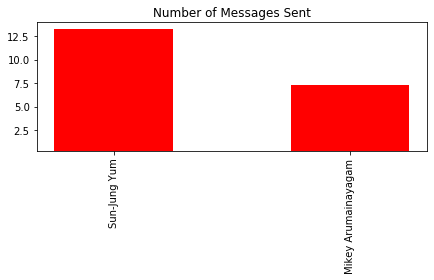

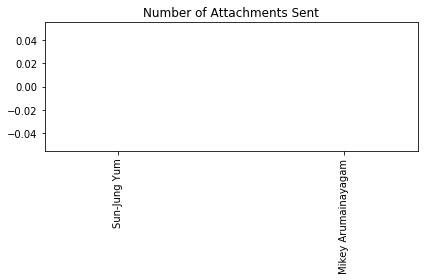

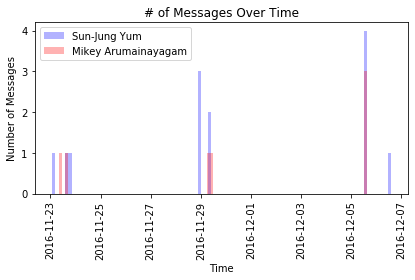

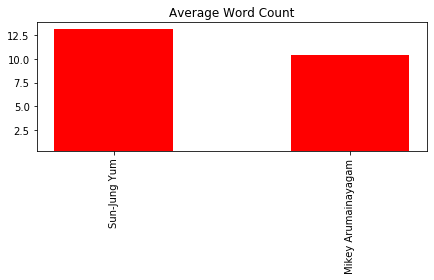

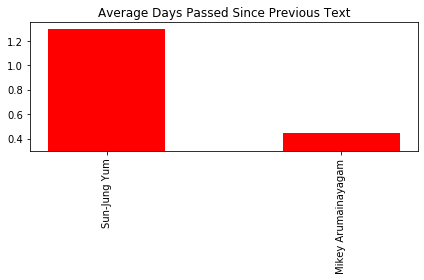

In [7]:
plot(140)